In [10]:
!curl -OL https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1215  100  1215    0     0   4760      0 --:--:-- --:--:-- --:--:--  4899
 59 4069M   59 2425M    0     0  16.6M      0  0:04:04  0:02:25  0:01:39 18.4M    0     0  15.9M      0  0:04:15  0:00:19  0:03:56 18.3M00:20  0:03:52 19.0M 0  0:04:06  0:01:53  0:02:13 16.7M    0  16.4M      0  0:04:06  0:01:54  0:02:12 15.2M4:04  0:02:24  0:01:40 16.1M
curl: (56) Recv failure: Connection reset by peer


In [14]:
!tar -xf data.v20221029.tar

In [2]:
#@title Preload models (takes about ~20 seconds on default settings)
import os
import numpy as np
import IPython.display

from PIL import Image
from matplotlib.pyplot import imshow

from stable_diffusion_pytorch import pipeline
from stable_diffusion_pytorch import model_loader

%matplotlib inline


In [3]:
models = model_loader.preload_models('cpu')

100%|██████████| 20/20 [03:07<00:00,  9.36s/it]


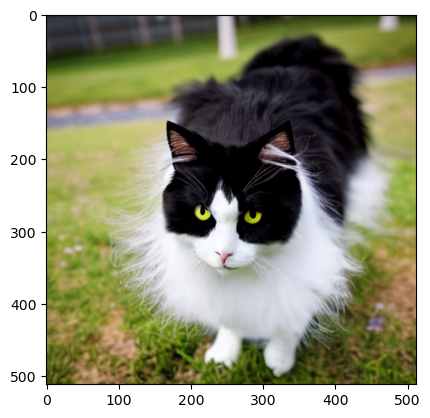

In [14]:
#Positive prompt
prompt = "A long-haired tuxedo cat, almost black, white chest, white feet, white mouth, yellow eyes"  #@param { type: "string" }
prompts = [prompt]

#Negative prompt
uncond_prompt = "" #@param { type: "string" }
uncond_prompts = [uncond_prompt] if uncond_prompt else None

#Generation parameters
device = 'cpu' #@param {"cpu", "cuda", "mps"]
strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }
do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 20  #@param { type: "integer" }

use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

image = pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=[], strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  models=models, device=device, idle_device='cpu')[0]

imshow(np.asarray(image))